In [1]:
%matplotlib inline
import os
import re

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

/lfs1/home/jackyu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


<module 'climatools.scripts.g1_threshold' from '/lfs1/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [2]:
# for printing some input parameters

def innames():
    return ['vstar', 'nband', 'nv', 'dv',
            'flgh2o',
            'tsfc',
            'pressure_reference_1',
            'temperature_reference_1', 
            'pressure_reference_2', 
            'temperature_reference_2',
            'ighigh', 
            'ng', 
            'nref',
            'p_refs',
            't_refs',
            'ng_refs',
            'absth',
            'wgt',
            'option_wgt_flux',
            'option_wgt_k',
            'option_klin',
            'fac_meank',
            'klin']



def pattern_assign(name):
    return ''' 
    parameter .* :: \s* &? \s* ({} \s* = .* \n)
    '''.format(name)

def pattern_data(name):
    return '''
    (data [^/{name}]+ {name}[^,] [^/{name}]+ / [^/]+ /)
    '''.format(name=name)

def pattern_atmpro():
    return '''
    (include \s+ '.*\.pro')
    '''


def get_input_params(code, names):
    results = []
    for name in names:
        regex = re.compile(pattern_assign(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
        regex = re.compile(pattern_data(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
    regex = re.compile(pattern_atmpro(), re.VERBOSE)
    results.extend(regex.findall(code))
        
    results = [result.replace('_r8', '') for result in results]
    return results


In [3]:
analysis = scripts.Analysis()

In [4]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/lfs1/home/jackyu/radiation',
                          'crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band03a_wn_540_620',
                          'ng_7',
                          'g_ascending_k_descending',
                          'refPTs_P_600_T_250',
                          'ng_refs_7',
                          'getabsth_auto',
                          'absth_dlogN_uniform',
                          'wgt_.7_.7_.7_.5_.5_.5_.5',
                          'wgt_flux_2',
                          'wgt_k_1',
                          'crd_0f8bc9f',
                          'atmpro_trp')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [5]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/lfs1/home/jackyu/radiation',
                          'crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band03a_wn_540_620',
                          'ng_7',
                          'g_ascending_k_descending',
                          'refPTs_P_600_T_250',
                          'ng_refs_7',
                          'getabsth_auto',
                          'absth_dlogN_uniform',
                          'wgt_.7_.7_.7_.5_.5_.5_.5',
                          'wgt_flux_2',
                          'wgt_k_1',
                          'crd_0f8bc9f',
                          'atmpro_trp')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [6]:
fig = analysis.fig_fluxcoolr('fig1', vartypes=['cooling rate'])
fig.ggroups = list(crd.data['dgdgs'].coords['g'].values) #list(range(1, 8 + 1))
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-2, 200)

fig.set_pressure_displayrange(low=1e-2)

In [7]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [8]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [9]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [10]:
with open(os.path.join(crd.rundir, 'lblnew.f'), 
          mode='r', encoding='utf-8') as f:
    c = f.read()

print('\n\n'.join(get_input_params(c, innames())))

vstar = 540

nband = 80

nv = 200

dv = 0.005

tsfc = 300.0

ng = 7

nref = 1

p_refs = (/ 600 /)

t_refs = (/ 250 /)

ng_refs = (/ 7 /)

data wgt
     &     /3*.7, 4*.5/

option_wgt_flux = 2

option_wgt_k = 1

option_klin = 0

klin = 6.375563e-24

include 'trp75.pro'


In [11]:
fig.display_hrefanchor()

In [12]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()

table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [13]:
table_dgdgs.display_hrefanchor()

In [14]:
s_abscom = 'Overall absth'
display.HTML(climahtml.getHTML_hrefanchor(s_abscom))

In [15]:
s_ggroup_summary = 'g-group summary'
display.HTML(climahtml.getHTML_hrefanchor(s_ggroup_summary))

In [16]:
#for g in range(1, 20 + 1):
#    s = 'Table: cooling rate. g-group {}'.format(g)
#    html = climahtml.getHTML_hrefanchor(s)
#    display.display(display.HTML(html))

# Figure: cooling rate g-group 1

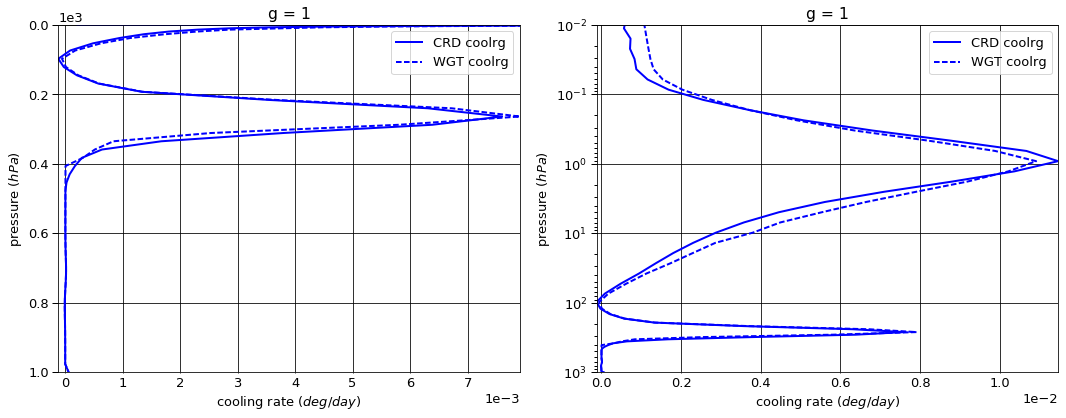

# Figure: cooling rate g-group 2

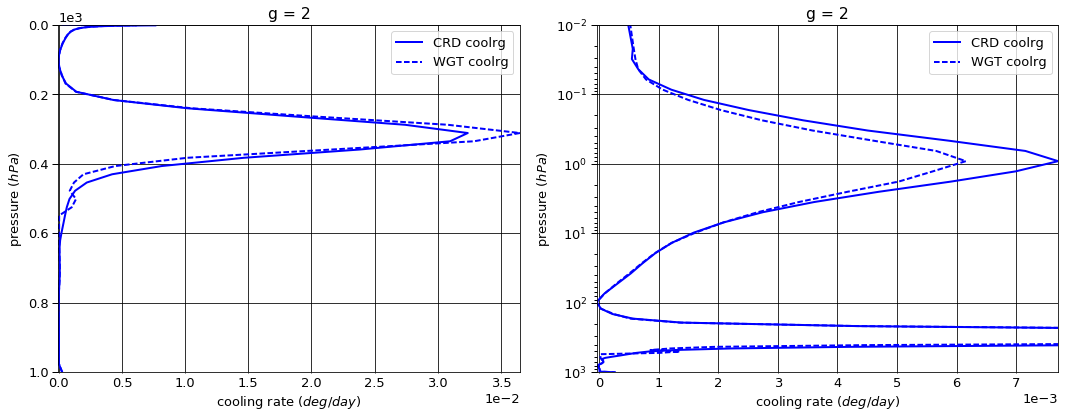

# Figure: cooling rate g-group 3

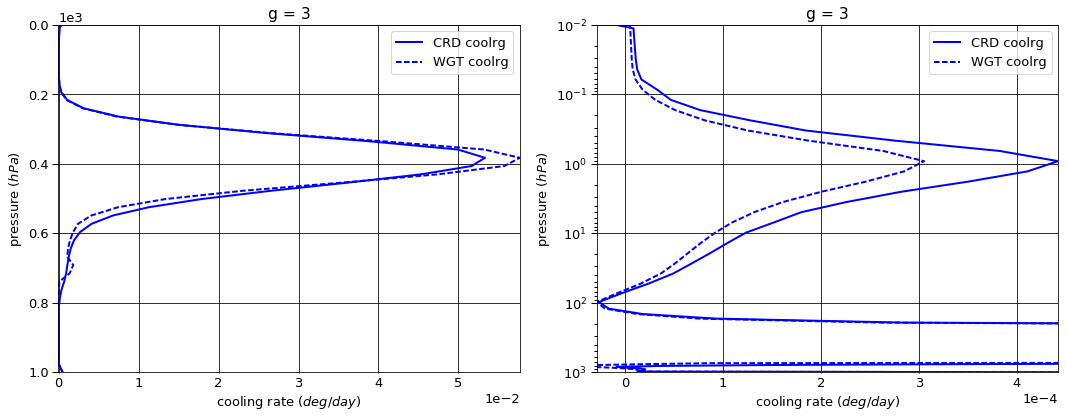

# Figure: cooling rate g-group 4

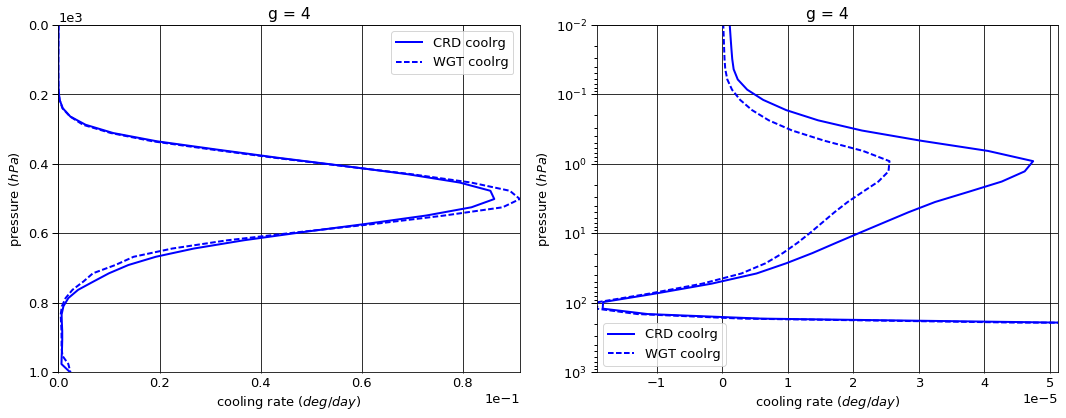

# Figure: cooling rate g-group 5

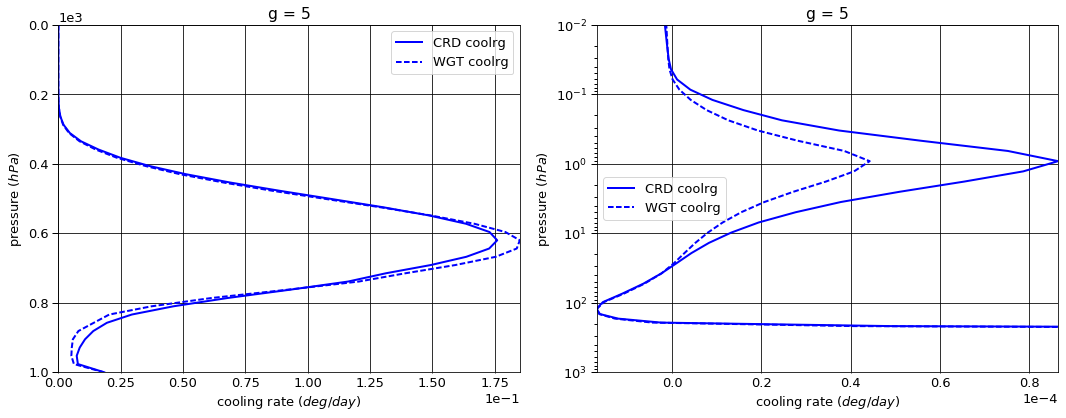

# Figure: cooling rate g-group 6

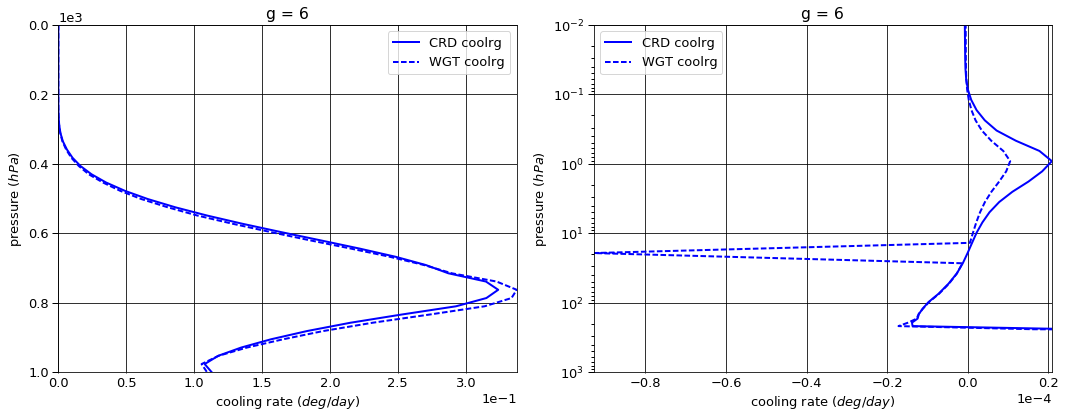

# Figure: cooling rate g-group 7

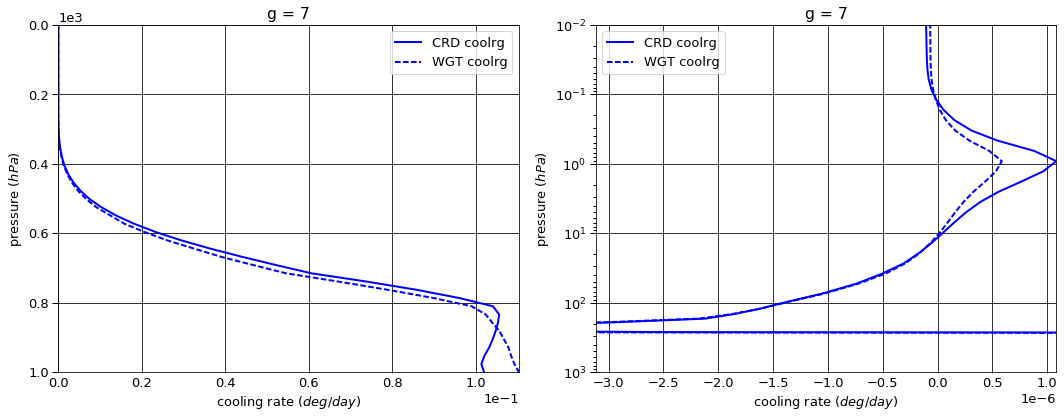

# Figure: cooling rate g-group total

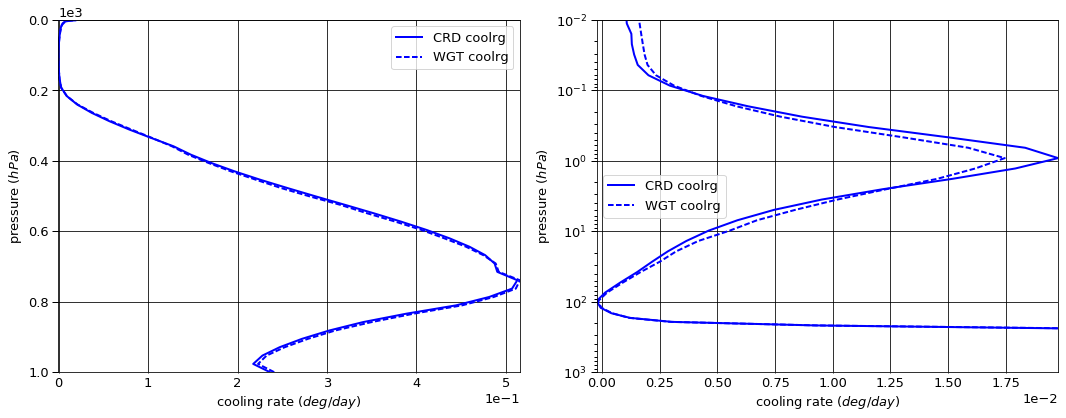

In [17]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [18]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug       fldg      fnetg
g pressure level                                 
1 0.0      1      -0.105648   0.000000  -0.105648
  1013.0   76     -0.259884   0.259712  -0.000173
2 0.0      1      -0.525783   0.000000  -0.525783
  1013.0   76     -1.099170   1.098435  -0.000734
3 0.0      1      -1.145519   0.000000  -1.145519
  1013.0   76     -2.039552   2.038190  -0.001362
4 0.0      1      -2.489714   0.000000  -2.489714
  1013.0   76     -3.830348   3.824514  -0.005834
5 0.0      1      -6.427599   0.000000  -6.427599
  1013.0   76     -8.649567   8.589558  -0.060009
6 0.0      1     -13.316212   0.000000 -13.316212
  1013.0   76    -16.017142  15.256634  -0.760508
7 0.0      1      -5.979825   0.000000  -5.979825
  1013.0   76     -6.596071   4.833970  -1.762101


WGT


flug       fldg      fnetg
g pressure level                                 
1 0.0      1      -0.102858   0.000000  -0.102858
  1013.0   76     -0.259884   0.259712  -0.000173
2 0.0      1      -0.517099   0.000000  -0.517099
  1013.0   76     -1.099170   1.098435  -0.000734
3 0.0      1      -1.135504   0.000000  -1.135504
  1013.0   76     -2.039552   2.038190  -0.001362
4 0.0      1      -2.480895   0.000000  -2.480895
  1013.0   76     -3.830348   3.827797  -0.002551
5 0.0      1      -6.419475   0.000000  -6.419475
  1013.0   76     -8.649567   8.595062  -0.054505
6 0.0      1     -13.335411   0.000000 -13.335411
  1013.0   76    -16.017142  15.398619  -0.618523
7 0.0      1      -6.015187   0.000000  -6.015187
  1013.0   76     -6.596071   4.707434  -1.888636


WGT - CRD


flug      fldg     fnetg
g pressure level                              
1 0.0      1      0.002790  0.000000  0.002790
  1013.0   76     0.000000  0.000000  0.000000
2 0.0      1      0.008684  0.000000  0.008684
  1013.0   76     0.000000  0.000000  0.000000
3 0.0      1      0.010015  0.000000  0.010015
  1013.0   76     0.000000  0.000000  0.000000
4 0.0      1      0.008819  0.000000  0.008819
  1013.0   76     0.000000  0.003282  0.003283
5 0.0      1      0.008124  0.000000  0.008124
  1013.0   76     0.000000  0.005504  0.005504
6 0.0      1     -0.019199  0.000000 -0.019199
  1013.0   76     0.000000  0.141985  0.141985
7 0.0      1     -0.035362  0.000000 -0.035362
  1013.0   76     0.000000 -0.126536 -0.126535

# Table: cooling rate. g-groups 


CRD


coolrg
g pressure    layer              
1 0.000312    1      2.837945e-04
  1001.112500 75     6.206312e-05
2 0.000312    1      3.501072e-04
  1001.112500 75     2.634922e-04
3 0.000312    1      3.794393e-06
  1001.112500 75     4.889458e-04
4 0.000312    1      4.494171e-07
  1001.112500 75     2.323699e-03
5 0.000312    1     -3.291338e-06
  1001.112500 75     1.840998e-02
6 0.000312    1     -8.561572e-07
  1001.112500 75     1.130399e-01
7 0.000312    1     -1.183283e-07
  1001.112500 75     1.019533e-01


WGT


coolrg
g pressure    layer              
1 0.000312    1      7.692564e-04
  1001.112500 75     6.206312e-05
2 0.000312    1      3.428048e-04
  1001.112500 75     2.634922e-04
3 0.000312    1      2.020407e-06
  1001.112500 75     4.889458e-04
4 0.000312    1     -1.630407e-07
  1001.112500 75     2.372769e-03
5 0.000312    1     -2.173800e-06
  1001.112500 75     1.828057e-02
6 0.000312    1     -5.620055e-07
  1001.112500 75     1.095787e-01
7 0.000312    1     -7.521906e-08
  1001.112500 75     1.102906e-01


WGT - CRD


coolrg
g pressure    layer              
1 0.000312    1      4.854619e-04
  1001.112500 75     0.000000e+00
2 0.000312    1     -7.302470e-06
  1001.112500 75     0.000000e+00
3 0.000312    1     -1.773985e-06
  1001.112500 75     0.000000e+00
4 0.000312    1     -6.124578e-07
  1001.112500 75     4.907010e-05
5 0.000312    1      1.117539e-06
  1001.112500 75    -1.294120e-04
6 0.000312    1      2.941517e-07
  1001.112500 75    -3.461190e-03
7 0.000312    1      4.310927e-08
  1001.112500 75     8.337280e-03

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-29.990301,0.000000,-29.990301
1013.0,76,-38.491734,35.901013,-2.590721



WGT


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-30.006430,0.000000,-30.006430
1013.0,76,-38.491734,35.925249,-2.566485



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-0.016129,0.000000,-0.016129
1013.0,76,0.000000,0.024236,0.024236


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,0.000634
1001.112500,75,0.236541



WGT


,,coolrg
pressure,layer,
0.000312,1,0.001111
1001.112500,75,0.241337



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,0.000477
1001.112500,75,0.004796


In [19]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.006750,0.006798
2,0.028563,0.028687
3,0.053000,0.053233
4,0.099562,0.100153
5,0.224750,0.225604
6,0.416125,0.416491
7,0.171250,0.169035


In [20]:
# read and display overall absth
display.display(
    display.HTML(climahtml.getHTML_idanchor(s_abscom)))
display.display(
    display.Markdown(climahtml.getMarkdown_sectitle(s_abscom)))

display.display(pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'),
                sep=r'\s+',
                index_col=[0]))

# Overall absth

,abscom
g,
1,7.643251e-21
2,1.773812e-21
3,4.116584e-22
4,9.553585e-23
5,2.217154e-23
6,5.145472e-24
7,1.194138e-24


In [21]:
def spreadsheet():
    ng = crd.data['dgdgs'].dims['g']
    ng_refs = [7]
    p_refs = [600]
    
    df_abscom = pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'), 
                            sep=r'\s+', index_col=[0])
    
    # absth(g + 1) / absth(g)
    df_abscom_copy = df_abscom.copy()
    df_abscom_copy.index = df_abscom.index + 1
    df_absratio = df_abscom / df_abscom_copy
    df_absratio.columns = ['k(ig) / k(ig - 1)']
    df_absratio = df_absratio.loc[: ng]
    df_dgdgs = crd.data['dgdgs'].to_dataframe()
    
    
    df_dgdgs_cumsum = df_dgdgs.cumsum(axis=0)
    df_dgdgs_cumsum.columns = ['dg cumsum', 'dgs cumsum']
    
    data_pref = np.concatenate([p_ref * np.ones((ng_ref,)) 
                                for ng_ref, p_ref 
                                in zip(ng_refs, p_refs)], axis=0)
    df_pref = pd.DataFrame(data_pref, 
                           index=df_dgdgs.index, columns=['pref'])
    
    df_all = pd.concat([df_abscom, df_absratio,
                        df_dgdgs, df_dgdgs_cumsum,
                        df_pref], axis=1) 
    return df_all
    

In [22]:
display.display(display.HTML(climahtml.getHTML_idanchor(s_ggroup_summary)))
display.display(display.Markdown(climahtml.getMarkdown_sectitle(s_ggroup_summary)))
display.display(spreadsheet())

# g-group summary

,abscom,k(ig) / k(ig - 1),dg,dgs,dg cumsum,dgs cumsum,pref
g,,,,,,,
1,7.643251e-21,NaN,0.006750,0.006798,0.006750,0.006798,600.0
2,1.773812e-21,0.232076,0.028563,0.028687,0.035313,0.035485,600.0
3,4.116584e-22,0.232076,0.053000,0.053233,0.088313,0.088718,600.0
4,9.553585e-23,0.232076,0.099562,0.100153,0.187875,0.188871,600.0
5,2.217154e-23,0.232076,0.224750,0.225604,0.412625,0.414475,600.0
6,5.145472e-24,0.232076,0.416125,0.416491,0.828750,0.830965,600.0
7,1.194138e-24,0.232076,0.171250,0.169035,1.000000,1.000000,600.0


In [23]:
def load_d_bigsum():
    
    ng = 10
    
    fpath = os.path.join(crd.rundir, 'd_bigsum.dat')
    df = pd.read_csv(fpath, sep=r'\s+', index_col = [0, 1])

    g_layers = [(1, 62), (2, 58)]
    
    writer = pd.ExcelWriter('_'.join(['d_bigsum_absgas',
                                      'ng_{}'.format(ng)])
                            + '.xlsx')
    for g, layer in g_layers:
        df.loc[(g, layer), :].to_excel(writer, 
                                       '({}, {})'.format(g, layer))
        

#load_d_bigsum()

# `absmean`-to-`absmeanlog` Ratio

In [24]:
pd.set_option('display.max_rows', None)
display.display(
    pd.read_csv(os.path.join(crd.rundir, 'absmean.dat'), 
                index_col=[0, 1],
                sep=r'\s+')
    )
pd.reset_option('display.max_rows')

pressure       absmean    absmeanlog      ratio
layer g                                                    
1     1     0.000312  1.116662e-20  5.423658e-22  20.588715
      2     0.000312  1.672802e-21  3.546342e-23  47.169792
      3     0.000312  1.309242e-23  1.319623e-24   9.921340
      4     0.000312  1.436809e-24  1.971404e-25   7.288252
      5     0.000312  2.105660e-24  1.237100e-25  17.020939
      6     0.000312  1.601385e-25  1.652251e-26   9.692142
      7     0.000312  3.498072e-26  4.191472e-27   8.345688
2     1     0.000750  1.123498e-20  5.431075e-22  20.686476
      2     0.000750  1.682436e-21  3.549792e-23  47.395338
      3     0.000750  1.327212e-23  1.324791e-24  10.018274
      4     0.000750  1.450592e-24  1.980248e-25   7.325305
      5     0.000750  2.118194e-24  1.241182e-25  17.065945
      6     0.000750  1.616078e-25  1.661923e-26   9.724146
      7     0.000750  3.515356e-26  4.211872e-27   8.346304
3     1     0.001052  1.137425e-20  5.443764e-22  20.894088
      2     0.001052  1.702136e-21  3.554336e-23  47.888994
      3     0.001052  1.364044e-23  1.333123e-24  10.231950
      4     0.001052  1.478506e-24  1.996547e-25   7.405313
      5     0.001052  2.143848e-24  1.249091e-25  17.163274
      6     0.001052  1.646206e-25  1.680501e-26   9.795925
      7     0.001052  3.550257e-26  4.251356e-27   8.350880
4     1     0.001476  1.151678e-20  5.457076e-22  21.104298
      2     0.001476  1.722284e-21  3.559433e-23  48.386473
      3     0.001476  1.402356e-23  1.342001e-24  10.449738
      4     0.001476  1.507322e-24  2.013542e-25   7.485922
      5     0.001476  2.170181e-24  1.257279e-25  17.260938
      6     0.001476  1.677362e-25  1.699596e-26   9.869186
      7     0.001476  3.586181e-26  4.292926e-27   8.353698
5     1     0.002070  1.166068e-20  5.471027e-22  21.313519
      2     0.002070  1.742608e-21  3.565260e-23  48.877434
      3     0.002070  1.441690e-23  1.351522e-24  10.667158
      4     0.002070  1.536699e-24  2.031182e-25   7.565541
      5     0.002070  2.196845e-24  1.265683e-25  17.356999
      6     0.002070  1.709160e-25  1.719054e-26   9.942443
      7     0.002070  3.622707e-26  4.336330e-27   8.354315
6     1     0.002904  1.180595e-20  5.485928e-22  21.520433
      2     0.002904  1.763096e-21  3.572130e-23  49.356990
      3     0.002904  1.482084e-23  1.361954e-24  10.882045
      4     0.002904  1.566677e-24  2.049687e-25   7.643496
      5     0.002904  2.223837e-24  1.274359e-25  17.450633
      6     0.002904  1.741610e-25  1.739006e-26  10.014975
      7     0.002904  3.659892e-26  4.381919e-27   8.352259
7     1     0.004074  1.195261e-20  5.502221e-22  21.723242
      2     0.004074  1.783740e-21  3.580483e-23  49.818404
      3     0.004074  1.523597e-23  1.373672e-24  11.091421
      4     0.004074  1.597321e-24  2.069374e-25   7.718862
      5     0.004074  2.251154e-24  1.283388e-25  17.540710
      6     0.004074  1.774737e-25  1.759644e-26  10.085772
      7     0.004074  3.697821e-26  4.430184e-27   8.346880
8     1     0.005714  1.210078e-20  5.520533e-22  21.919591
      2     0.005714  1.804540e-21  3.590937e-23  50.252610
      3     0.005714  1.566333e-23  1.387202e-24  11.291309
      4     0.005714  1.628742e-24  2.090702e-25   7.790410
      5     0.005714  2.278815e-24  1.292892e-25  17.625718
      6     0.005714  1.808591e-25  1.781257e-26  10.153454
      7     0.005714  3.736637e-26  4.481839e-27   8.337285
9     1     0.008015  1.225048e-20  5.541729e-22  22.105890
      2     0.008015  1.825473e-21  3.604360e-23  50.646251
      3     0.008015  1.610382e-23  1.403270e-24  11.475922
      4     0.008015  1.661059e-24  2.114300e-25   7.856309
      5     0.008015  2.306807e-24  1.303030e-25  17.703409
      6     0.008015  1.843199e-25  1.804233e-26  10.215972
      7     0.008015  3.776489e-26  4.537826e-27   8.322241
10    1     0.011243  1.240185e-20  5.567032e-22  22.277321
      2     0.011243  1.846524e-21  3.621970e-23  50

# Histogram of wavenumbers in g-group 1

In [25]:
#pd.read_csv(os.path.join(crd.rundir, 'ig1.dat')).hist()

In [26]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')
